<h1><center>Miami Housing Prediction & Analysis</center></h1>




<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📚Importing necessary libraries 📚</h1>

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
# import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
from sima.sklearn_modified.sklearn.metrics import mean_absolute_error
from sima.sklearn_modified.sklearn.metrics import mean_squared_error
from sima.sklearn_modified.sklearn.metrics import r2_score
from sima.sklearn_modified.sklearn.preprocessing import MinMaxScaler

# import geopandas as gdf
import os
warnings.filterwarnings('ignore')


<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset</h1>

In [4]:
df =pd.read_csv("dataset/miami-housing.csv")


<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</h1>

In [4]:
df.shape,df.size

((13932, 17), 236844)

In [5]:
print( df.duplicated().sum())

0


In [6]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Columns: 17 entries, LATITUDE to structure_quality
dtypes: float64(9), int64(8)
memory usage: 1.8 MB


<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#003f88;border-color:black;width:60%;margin: auto;text-align: left;">
<b>Insight:</b> 🔨🔨🔨13932 rows and 17 columns, 236844 values, No null value, No duplicate ,Memory Usage: 1.8 MB


In [7]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Visualization</h1>

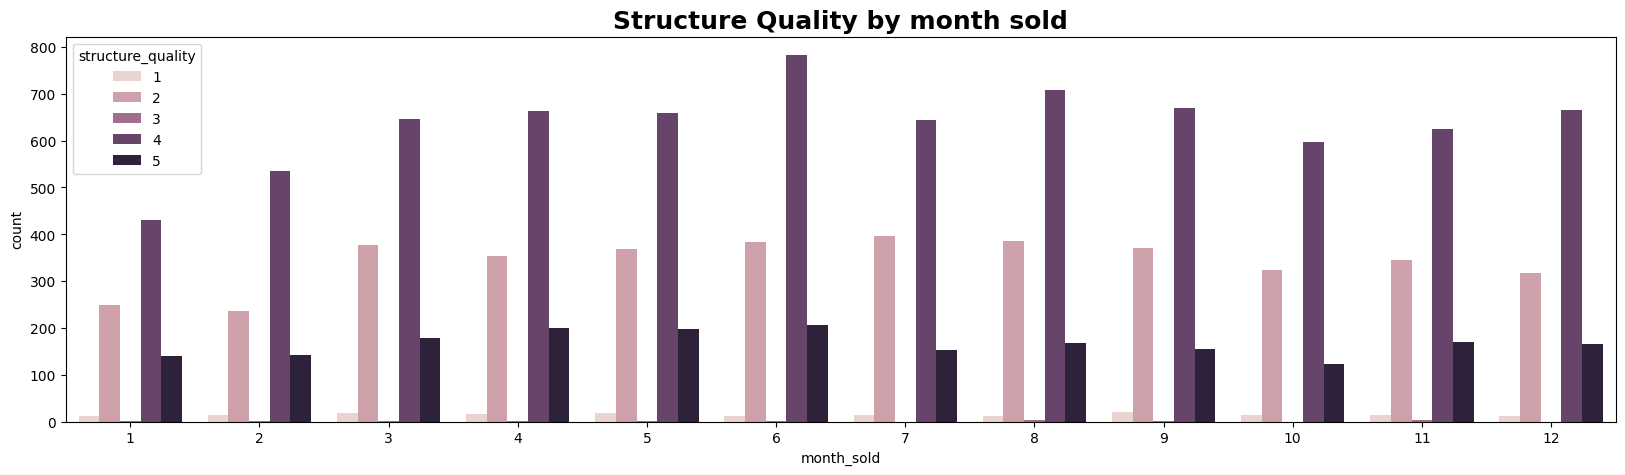

In [8]:
plt.figure(figsize=(20,5))
#sns.set_theme(style="darkgrid")

ax = sns.countplot(x="month_sold",hue = 'structure_quality', data=df)

plt.title("Structure Quality by month sold", fontsize=18,weight='bold')
plt.show()

In [9]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = df['month_sold'],
                     values = df['SALE_PRC'],title = 'Sale by month',
                     name = "Sale by Month",
                     hole = 0.75
                    )
             )


fig.update_traces(marker=dict(
     line=dict(
        color='black',
        width=1
    )))

fig.show()

<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Selection</h1>

In [10]:
col_unique_value = list()
for col in df.columns.tolist():
    if df[col].nunique() == 1:
        col_unique_value .append(col)

print(col_unique_value )

[]


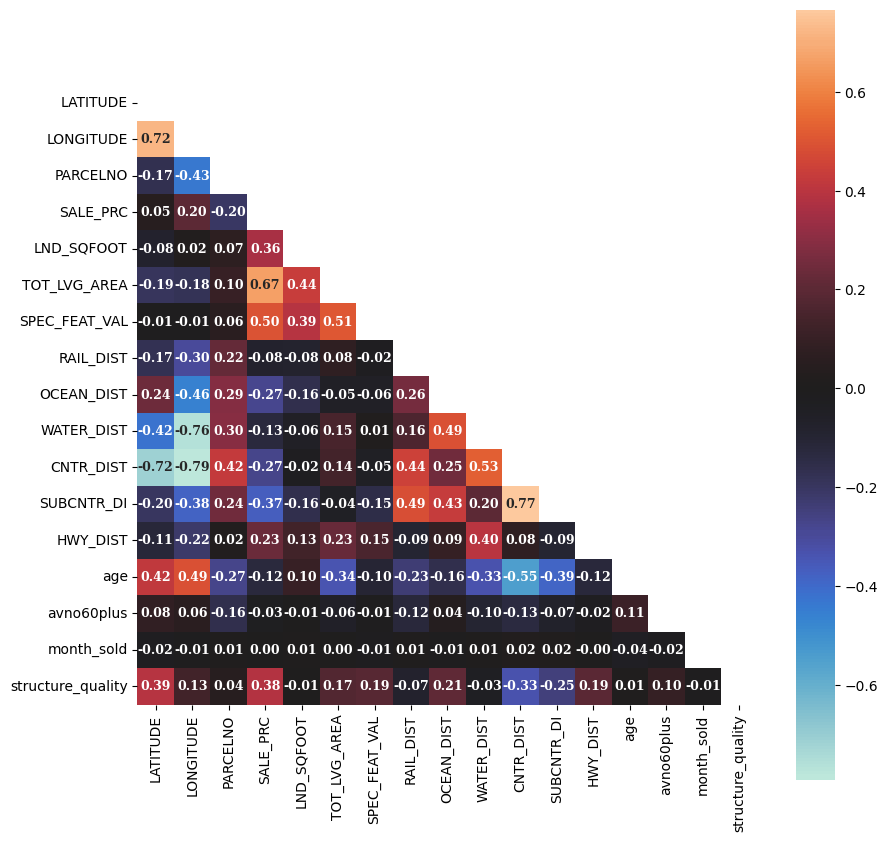

In [11]:
plt.figure(figsize=(10, 10))
# Calculate pairwise-correlation
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True,annot_kws={
                'fontsize': 9,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })

plt.show();

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#003f88;border-color:black;width:60%;margin: auto;text-align: left;">
<center><b>Insight:</b> 🔨No column to drop  with unique value, No High   correlation 🔨<center>

<h1 style="padding:10px;background-color:#c2c6e3;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model</h1>

In [12]:
from sima.sklearn_modified.sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'SALE_PRC']
X=(X-X.min())/(X.max()-X.min())
Y = df["SALE_PRC"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
#print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))

y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)

y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)


In [17]:
from sima.quantile_forest import RandomForestQuantileRegressor
qrf = RandomForestQuantileRegressor()
qrf.fit(X_train, y_train)
y_pred = qrf.predict(X_test, quantiles=[0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [19]:
pd.DataFrame(y_pred,columns=['0.1 quantile','0.2 quantile','0.3 quantile','0.4 quantile','0.5 quantile','0.6 quantile','0.7 quantile','0.8 quantile','0.9 quantile'])

,0.1 quantile,0.2 quantile,0.3 quantile,0.4 quantile,0.5 quantile,0.6 quantile,0.7 quantile,0.8 quantile,0.9 quantile
0,385000.0,395000.0,395000.0,395000.0,417500.0,427000.0,432500.0,449000.0,469900.0
1,390000.0,410000.0,416300.0,421000.0,428500.0,442000.0,442000.0,442000.0,455500.0
2,207900.0,248000.0,260000.0,269960.0,295000.0,305600.0,319000.0,337600.0,365500.0
3,380000.0,408000.0,420000.0,420000.0,420000.0,420000.0,430000.0,454700.0,500000.0
4,197000.0,197000.0,219400.0,252100.0,254000.0,254000.0,269000.0,274000.0,290100.0
...,...,...,...,...,...,...,...,...,...
4175,374500.0,385000.0,408000.0,420000.0,434950.0,455000.0,470000.0,470000.0,500500.0
4176,325530.0,330000.0,330000.0,330000.0,330000.0,330000.0,330600.0,330600.0,331000.0
4177,140000.0,148900.0,148900.0,149960.0,151000.0,152000.0,156650.0,161000.0,180400.0
4178,744000.0,750000.0,782500.0,785000.0,838500.0,882000.0,888900.0,920000.0,935000.0


In [15]:
y_test

,0
0,391000.0
1,420000.0
2,360000.0
3,465000.0
4,245000.0
...,...
4175,440500.0
4176,330000.0
4177,156000.0
4178,995000.0


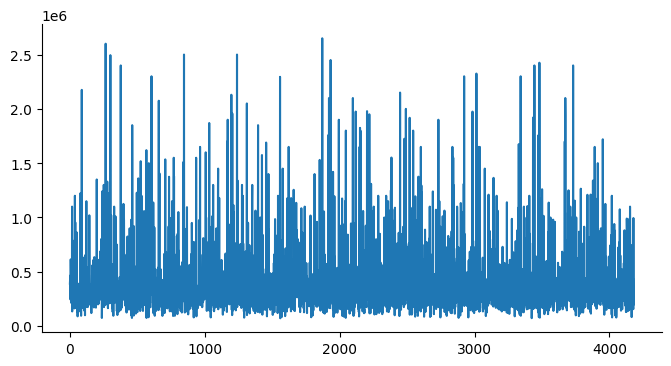